In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Heart Disease Prediction

## Background
> Penyakit jantung merupakan penyebab utama kematian di dunia. Pasalnya, penyakit jantung dapat menimbulkan serangan jantung hingga menyebabkan kematian mendadak pada penderitanya. Serangan jantung dapat terjadi akibat berhenti atau berkurangnya pasokan darah ke otot jantung secara mendadak. Hal tersebut yang menyebabkan penyempitan atau penyumbatan pada pembuluh jantung oleh gumpalan darah. Serangan jantung dapat terjadi kapan dan di mana saja. Maka dari itu, penting untuk melakukan deteksi penyakit jantung sedini mungkin.

## Problem
> Bagaimana dapat mendeteksi penyakit jantung berdasarkan karakteristik dan kondisi kesehatan seseorang

## Goal
> Dapat memprediksi atau mendeteksi adanya penyakit jantung pada seseorang sehingga jika terdeteksi maka bisa dilakukan penanganan lebih awal, mengurangi resiko kematian. Meskipun kematian tetaplah di tangan Tuhan yang Maha Esa.

## Dataset
> Dataset yang saya gunakan berasal dari: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [3]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Feature Description
> - age: Usia atau umur
> - sex: Jenis kelamin (1 = male; 0 = female)
> - cp: chest pain atau nyeri dada chest pain atau nyeri dada (0 = typical; 1 = asymptotic; 2 = non-anginal; 3 = nontypical)
> - trestbps: resting blood pressure / tekanan darah 
> - chol: serum cholestoral in mg/dl / kadar kolesterol total dalam darah
> - fbs: fasting blood sugar > 120 mg/dl / kadar gula dalam darah, di atas 120 pradiabetes (1 = true; 0 = false)
> - restecg: resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
> - thalach: maximum heart rate achieved
> - exang: exercise induced angina (1 = yes; 0 = no)
> - oldpeak: ST depression induced by exercise relative to rest
> - slope: the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)
> - ca: number of major vessels (0-3) colored by flourosopy
> - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
> - target: AHD, diagnosis of heart disease (1 = yes; 0 = no)

## Describe Data

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
datadesc = []
for i in df.columns:
    datadesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
desc = pd.DataFrame(data=datadesc, columns=['Data Features','Data Types','Null','% Null','Nunique','Unique_sample'])
desc

,Data Features,Data Types,Null,% Null,Nunique,Unique_sample
0,age,int64,0,0.0,41,"[38, 65]"
1,sex,int64,0,0.0,2,"[1, 0]"
2,cp,int64,0,0.0,4,"[0, 1]"
3,trestbps,int64,0,0.0,49,"[123, 130]"
4,chol,int64,0,0.0,152,"[196, 276]"
5,fbs,int64,0,0.0,2,"[0, 1]"
6,restecg,int64,0,0.0,3,"[0, 1]"
7,thalach,int64,0,0.0,91,"[121, 133]"
8,exang,int64,0,0.0,2,"[1, 0]"
9,oldpeak,float64,0,0.0,40,"[4.4, 1.6]"


- Sampai sini ternyata saya tidak menemukan missing value
- Lanjut, kita akan analisis univariate, sekalian handling outliers (jika ada)

## EDA

### Univariate

In [6]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

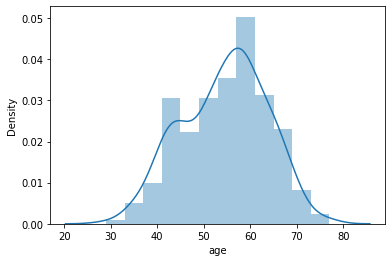

In [47]:
sns.distplot(df['age'])
plt.show()

In [8]:
## Cek outliers di kolom age
Q1 = df['age'].describe()['25%']
Q3 = df['age'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence: ', upper_fence)
print('lower_fence: ', lower_fence)
print('jumlah outliers di atas upper_fence: ', len(df[df['age'] > upper_fence]))
print('jumlah outliers di bawah lower_fence: ', len(df[df['age'] < lower_fence]))

upper_fence:  81.25
lower_fence:  27.25
jumlah outliers di atas upper_fence:  0
jumlah outliers di bawah lower_fence:  0


- Ternyata tidak ditemukan outliers pada kolom age, untuk visual nya, saya akan buat boxplot

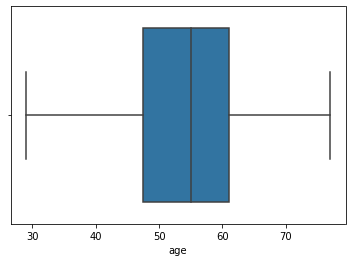

In [9]:
sns.boxplot(df['age'])
plt.show()

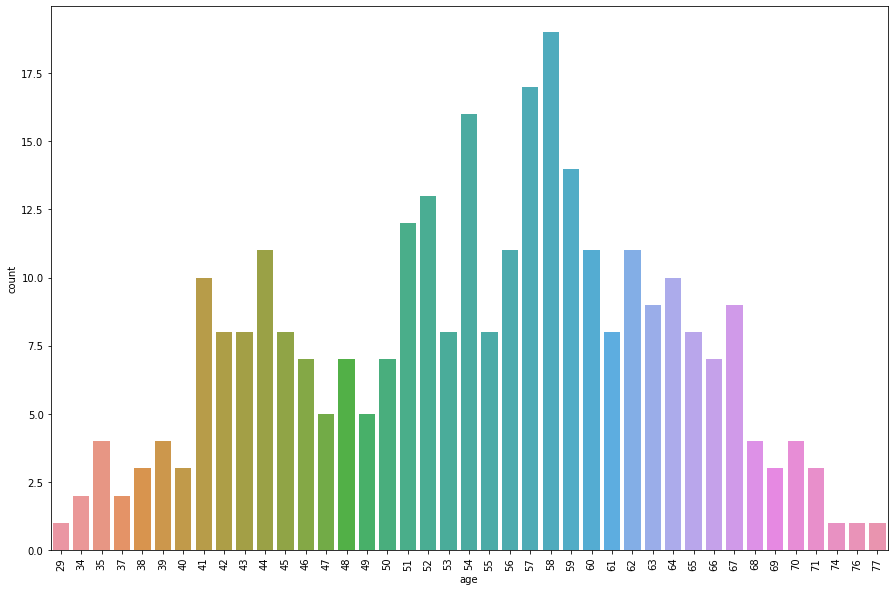

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(df['age'])
plt.xticks(rotation=90)
plt.show()

In [13]:
df['age'].value_counts().head()

58    19
57    17
54    16
59    14
52    13
Name: age, dtype: int64

In [14]:
df['age'].value_counts().tail()

37    2
77    1
76    1
74    1
29    1
Name: age, dtype: int64

- Dalam data ini paling banyak yang berusia 58 tahun berjumlah 19 orang. Paling sedikit yang berusia 77, 76, 74, 29 tahun masing-masing hanya 1 orang.
- Rata-rata usia orang dalam data ini 54 tahun

In [15]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

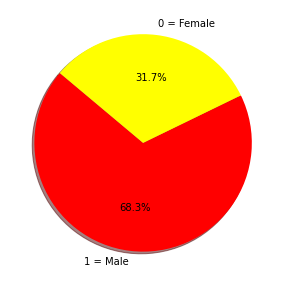

In [16]:
labels = '1 = Male', '0 = Female'
sizes = [207, 96]
colors = ['red', 'yellow']
explode = (0, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Lebih dari separuh (68.3%) orang dalam data ini berjenis kelamin laki-laki

In [17]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

chest pain atau nyeri dada (0 = typical; 1 = asymptotic; 2 = non-anginal; 3 = nontypical)

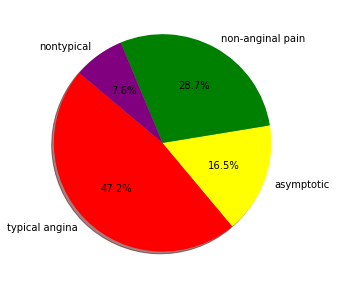

In [19]:
labels = 'typical angina', 'asymptotic', 'non-anginal pain', 'nontypical'
sizes = [143, 50, 87, 23,]
colors = ['red', 'yellow', 'green', 'purple']
explode = (0, 0, 0, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Hampir separuh (47.2%) dari orang dalam data ini mengalami typical angina atau nyeri jantung yang muncul saat jantung tidak mendapatkan cukup darah atau oksigen yang biasanya disebabkan oleh penyumbatan atau penumpukan plak di arteri koroner[1]
- Hanya 7.6 % yang mengalami nyeri dada non-jantung atau nyeri dada yang menyerupai nyeri jantung
[1]: https://www.harringtonhospital.org/typical-and-atypical-angina-what-to-look-for/#:~:text=Angina%20pectoris%20or%20typical%20angina,buildup%20in%20the%20coronary%20arteries.

In [20]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [23]:
## Cek outliers di kolom trestbps
Q1 = df['trestbps'].describe()['25%']
Q3 = df['trestbps'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence: ', upper_fence)
print('lower_fence: ', lower_fence)
print('jumlah outliers di atas upper_fence: ', len(df[df['trestbps'] > upper_fence]))
print('jumlah outliers di bawah lower_fence: ', len(df[df['trestbps'] < lower_fence]))

upper_fence:  170.0
lower_fence:  90.0
jumlah outliers di atas upper_fence:  9
jumlah outliers di bawah lower_fence:  0


- Ternyata ditemukan outliers pada kolom trestbps, untuk visual nya, saya akan buat boxplot

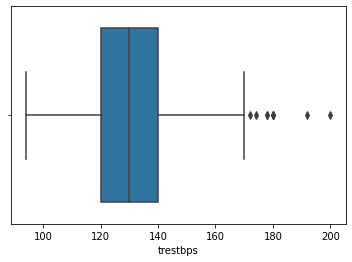

In [22]:
sns.boxplot(df['trestbps'])
plt.show()

In [24]:
df[df['trestbps'] > upper_fence]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


- Ada 9 data di kolom trestbps yang merupakan outlier, nilainya di atas upper fence. Saya akan tetap menggunakan outlier tersebut karena setelah dilihat datanya tidak semua orang yang memiliki trestbps / tekanan darah yang tinggi, bahkan di atas 170 (upper fence) mengalami penyakit jantung. Jadi outlier tidak mempengaruhi target.
- Saya berasumsi orang-orang yang memiliki tekanan darah yang tinggi miliki penyakit hipertensi. Meskipun hipertensi dapat meningkatkan resiko penyakit jantung tetapi hipertensi bukanlah penyebab utama penyakit jantung, dan hipertensi dapat diobati dengan merubah gaya hidup menjadi lebih sehat[1]
[1]: https://lifestyle.kompas.com/read/2020/02/19/152841420/efek-tekanan-darah-tinggi-pada-organ-tubuh?page=all#:~:text=Kadar%20tekanan%20darah%20yang%20tinggi,juga%20dapat%20mengurangi%20aliran%20darah.

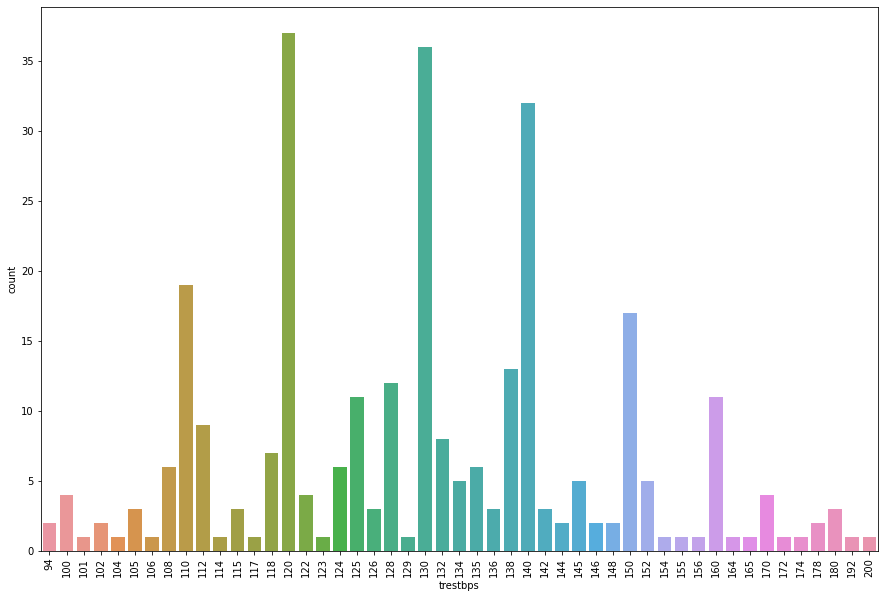

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(df['trestbps'])
plt.xticks(rotation=90)
plt.show()

In [35]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [36]:
## Kita binning kolom trestbps
df['trestbps_bin'] = pd.cut(df['trestbps'], bins=[93,130,200], labels=[0,1])

In [38]:
df['trestbps_bin'].value_counts()

0    171
1    132
Name: trestbps_bin, dtype: int64

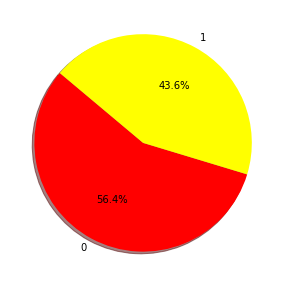

In [39]:
labels = '0', '1',
sizes = [171, 132]
colors = ['red', 'yellow']
explode = (0, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

Menurut perkumpulan dokter jantung di Amerika Serikat, AHA, pada tahun 2017, tekanan darah diklasifikasikan sebagai berikut:
- Normal: berada di bawah 120/80 mmHg.
- Meningkat: berkisar antara 120-129 untuk tekanan sistolik dan >80 mmHg untuk tekanan diastolik.
- Hipertensi tingkat 1: 130/80 mmHg hingga 139/89 mmHg.
- Hipertensi tingkat 2: 140/90 atau lebih tinggi.
 
 Berdasarkan data, lebih dari separuh (56.4%) orang memiliki range tekanan darah 94 - 130, selebihnya memiliki tekanan darah di atas 130

In [29]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [30]:
## Cek outliers di kolom chol
Q1 = df['chol'].describe()['25%']
Q3 = df['chol'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence: ', upper_fence)
print('lower_fence: ', lower_fence)
print('jumlah outliers di atas upper_fence: ', len(df[df['chol'] > upper_fence]))
print('jumlah outliers di bawah lower_fence: ', len(df[df['chol'] < lower_fence]))

upper_fence:  369.75
lower_fence:  115.75
jumlah outliers di atas upper_fence:  5
jumlah outliers di bawah lower_fence:  0


- Ternyata ditemukan outliers pada kolom chol, untuk visual nya, saya akan buat boxplot

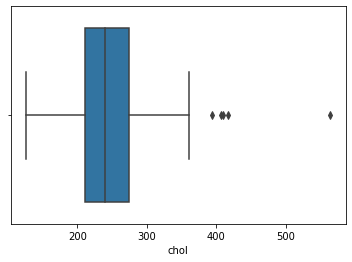

In [31]:
sns.boxplot(df['chol'])
plt.show()

In [32]:
df[df['chol'] > upper_fence]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


- Ada 5 data dalam kolom chol yang merupakan outliers. Setelah saya lihat datanya ternyata tidak semua yang memiliki kolesterol tinggi memiliki penyakit jantung. Jadi outlier tidak mempengaruhi hasil secara signifikan. Maka dari itu saya akan tetap menggunakan data outlier
- Kolesterol sendiri terdiri dari Kolesterol baik (HDL), Kolesterol jahat (LDL), dan Trigliserida. Gabungan dari ketiga nya disebut kolesterol total. Kadar kolesterol yang kurang dari 200 mg/dL masih bisa ditoleransi. Jumlah kadar kolesterol 200-239 mg/dL sudah masuk pada ambang batas tinggi. Jika jumlahnya mencapai 240 mg/dL atau lebih termasuk tingkat kolesterol tinggi.[1]
[1]: https://www.alodokter.com/pentingnya-mengetahui-tingkat-kolesterol-normal

In [41]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [42]:
## Binning kolom chol
df['chol_bin'] = pd.cut(df['chol'], bins=[125,240,564], labels=[0,1])

In [45]:
df['chol_bin'].value_counts()

0    152
1    151
Name: chol_bin, dtype: int64

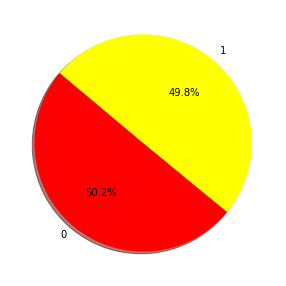

In [46]:
labels = '0', '1',
sizes = [152, 151]
colors = ['red', 'yellow']
explode = (0, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Separuh orang dalam data memiliki range kadar kolesterol 125 - 240
- Median kadar kolesterol dalam data ini sebesar 240

In [50]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

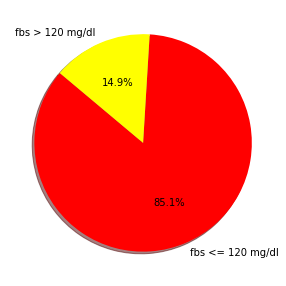

In [52]:
labels = 'fbs <= 120 mg/dl', 'fbs > 120 mg/dl',
sizes = [258, 45]
colors = ['red', 'yellow']
explode = (0, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Kadar gula darah puasa atau setelah tidak makan selama 8 jam normalnya kurang dari 100 mg/dL[1]
- Mayoritas (85.1%) orang dalam data memiliki kadar gula darah puasa <= 120
[1]: https://hellosehat.com/diabetes/gula-darah-normal/kadar-gula-darah-normal/#gref

In [54]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

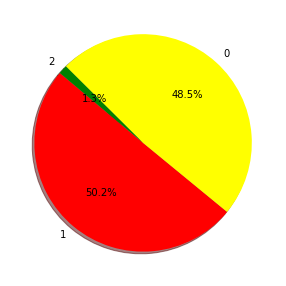

In [55]:
labels = '1', '0', '2'
sizes = [152, 147, 4]
colors = ['red', 'yellow' ,'green']
explode = (0, 0, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
- Separuh (50.2%) dari hasil Elektrokardiogram dalam data ini memiliki gelombang ST-T

In [56]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [57]:
## Cek outliers di kolom thalach
Q1 = df['thalach'].describe()['25%']
Q3 = df['thalach'].describe()['75%']
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print('upper_fence: ', upper_fence)
print('lower_fence: ', lower_fence)
print('jumlah outliers di atas upper_fence: ', len(df[df['thalach'] > upper_fence]))
print('jumlah outliers di bawah lower_fence: ', len(df[df['thalach'] < lower_fence]))

upper_fence:  214.75
lower_fence:  84.75
jumlah outliers di atas upper_fence:  0
jumlah outliers di bawah lower_fence:  1


- Ternyata ditemukan outliers pada kolom chol, untuk visual nya, saya akan buat boxplot

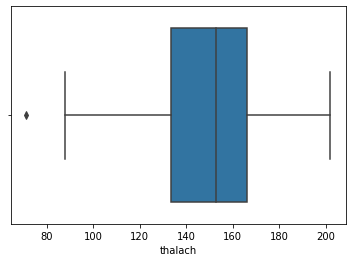

In [58]:
sns.boxplot(df['thalach'])
plt.show()

In [59]:
df[df['thalach'] < lower_fence]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_bin,chol_bin
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,0,0


- Setelah melihat data ternyata ditemukan 1 outlier yang nilainya di bawah lower fence (84.75). Berdasarkan yang saya ketahui dan sumber yang saya baca ternyata semakin tinggi usia, maka heart rate akan semakin menurun[1]. Maka dari itu saya akan tetap menggunakan data outlier
[1]: https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates

In [62]:
## Binning kolom thalach
df['thalach_bin'] = pd.cut(df['thalach'], bins=[70,153,202], labels=[0,1])

In [63]:
df['thalach_bin'].value_counts().head()

0    154
1    149
Name: thalach_bin, dtype: int64

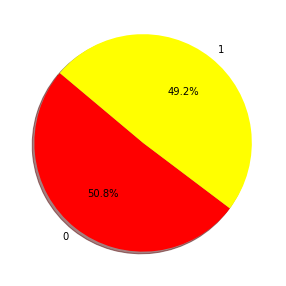

In [64]:
labels = '0', '1'
sizes = [154, 149]
colors = ['red', 'yellow']
explode = (0, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Separuh orang dalam data memiliki range maximum heart rate achieved 70 - 153, selebihnya memiliki maximum heart rate achieved di atas 153

In [66]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

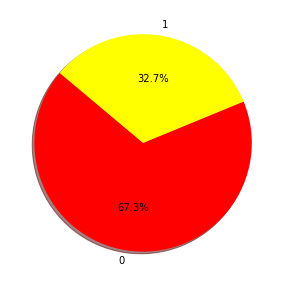

In [67]:
labels = '0', '1'
sizes = [204, 99]
colors = ['red', 'yellow']
explode = (0, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Lebih dari separuh (67.3%) orang dalam data ini tidak melakukan exercise untuk menghindari angin duduk, selebihnya (32.7%) mereka melakukan latihannya

In [72]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

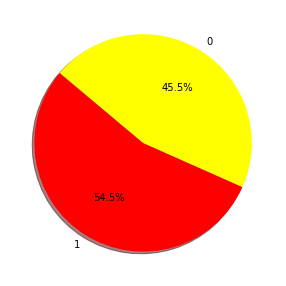

In [73]:
labels = '1', '0'
sizes = [165, 138]
colors = ['red', 'yellow']
explode = (0, 0)
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

- Lebih dari separuh (54.4%) orang dalam data ini dideteksi memiliki penyakit jantung.
- Dalam konsep machine learning, target yang saya miliki termasuk dalam kategori balance

### Bivariate

#### Target X Age X cp

In [74]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [77]:
## Binning kolom age
df['age_bin'] = pd.cut(df['age'], bins=[28,55,77], labels=[0,1])

<Figure size 1080x1080 with 0 Axes>

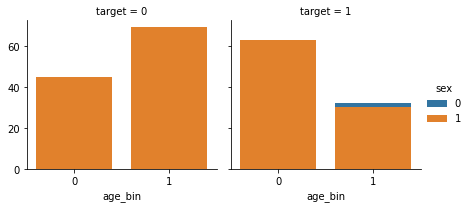

In [78]:
plt.figure(figsize=(15,15))
F = sns.FacetGrid(df, col='target', hue='sex')
F.map(sns.countplot, 'age_bin').add_legend()
plt.show()

In [80]:
pd.crosstab(index=[df['age_bin'], df['sex']], columns=df['target'])

target        0   1
age_bin sex        
0       0     4  40
        1    45  63
1       0    20  32
        1    69  30

- Berdasakan kelompok usia dan jenis kelamin, orang yang di diagnosa memiliki penyakit jantung paling banyak adalah laki-laki dengan kelompok usia 28 - 55 tahun berjumlah 63 orang. Sedangkan untuk kelompok usia 56 - 77 tahun yang didiagnosa memiliki penyakit jantung paling banyak berjenis kelamin perempuan

#### target X age_bin X chol_bin

In [81]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

<Figure size 1080x1080 with 0 Axes>

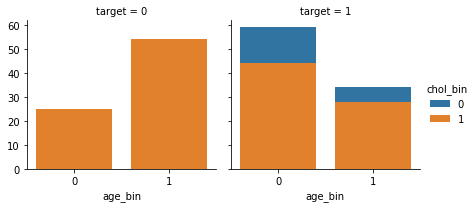

In [86]:
plt.figure(figsize=(15,15))
F = sns.FacetGrid(df, col='target', hue='chol_bin')
F.map(sns.countplot, 'age_bin').add_legend()
plt.show()

- Yang didiagnosa memiliki penyakit jantung dalam kelompok usia 28 - 55 tahun paling banyak adalah mereka yang memiliki range range kadar kolestrol 125 - 240
- Yang didiagnosa memiliki penyakit jantung dalam kelompok usia di atas 55 tahun paling banyak adalah mereka yang memiliki range range kadar kolestrol 125 - 240

REKOMENDASI:
- Harus di cek apakah dalam kolesterol total memiliki jumlah Kolesterol baik(HDL) yang lebih banyak dibandingkan kolesterol jahat (LDL), begitupun jumlah trigliserida atau lemak dalam darah, semakin rendah lemak dalam darah, semakin baik.

#### Target X trestbps_bin X fbs X age_bin

<Figure size 1080x1080 with 0 Axes>

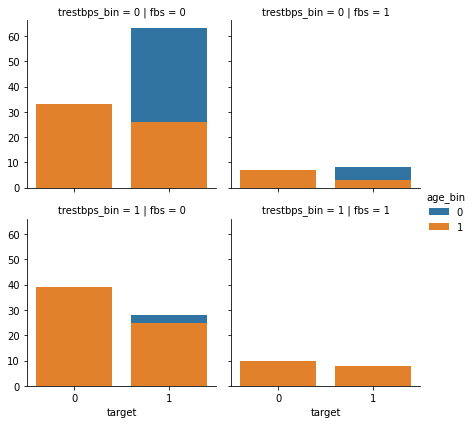

In [87]:
plt.figure(figsize=(15,15))
F = sns.FacetGrid(df, col='fbs', row ='trestbps_bin', hue='age_bin')
F.map(sns.countplot, 'target').add_legend()
plt.show()

- Kelompok yang memiliki trestbps dengan range 93 - 130 dan fbs dengan range <= 120 mg/dl, yang memiliki penyakit jantung paling banyak berasal dari kelompok usia 28 - 55 tahun
- Kelompok yang memiliki trestbps dengan range 93 - 130 dan fbs di atas 120 mg/dl, yang memiliki penyakit jantung paling banyak berasal dari kelompok usia 28 - 55 tahun
- Kelompok yang memiliki trestbps dengan di atas 130 dan fbs <= 120 mg/dl, yang memiliki penyakit jantung paling banyak berasal dari kelompok usia 28 - 55 tahun
- Kelompok yang memiliki trestbps dengan di atas 130 dan fbs > 120 mg/dl, yang memiliki penyakit jantung paling banyak berasal dari kelompok usia di atas 55 tahun

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           303 non-null    int64   
 1   sex           303 non-null    int64   
 2   cp            303 non-null    int64   
 3   trestbps      303 non-null    int64   
 4   chol          303 non-null    int64   
 5   fbs           303 non-null    int64   
 6   restecg       303 non-null    int64   
 7   thalach       303 non-null    int64   
 8   exang         303 non-null    int64   
 9   oldpeak       303 non-null    float64 
 10  slope         303 non-null    int64   
 11  ca            303 non-null    int64   
 12  thal          303 non-null    int64   
 13  target        303 non-null    int64   
 14  trestbps_bin  303 non-null    category
 15  chol_bin      303 non-null    category
 16  thalach_bin   303 non-null    category
 17  age_bin       303 non-null    category
dtypes: categor

#### Target X restecg X thalach_bin X age_bin

<Figure size 1080x1080 with 0 Axes>

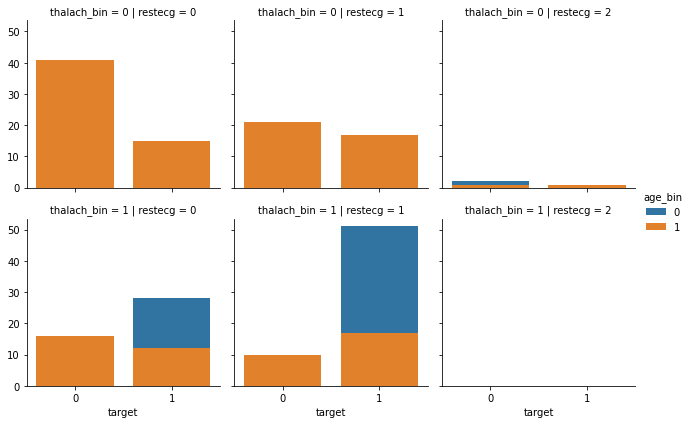

In [91]:
plt.figure(figsize=(15,15))
F = sns.FacetGrid(df, col='restecg', row ='thalach_bin', hue='age_bin')
F.map(sns.countplot, 'target').add_legend()
plt.show()

Secara general:
- Kelompok dengan maximum heart rate <= 153, lebih banyak yang tidak memiliki penyakit jantung meski punya hasil EKG yang berbeda-beda
- Kelompok dengan maximum heart rate <= 153, yang memiliki penyakit jantung mayoritas adalah kelompok usia di atas 55 tahun
- Kelompok dengan maximum heart rate > 153, lebih banyak yang memiliki penyakit jantung meskipun memiliki hasil EKG yang berbeda-beda, dan mayoritas mereka berasal dari kelompok usia <= 55 tahun
- Saya berasumsi faktor heart rate memiliki pengaruh dalam membuat kelompok usia <= 55 tahun memiliki penyakit jantung

REKOMENDASI:
- Menjaga heart rate agar tidak melebihi kapasitasnya. Menurut dr. Vienna ada beberapa cara untuk menjaga irama jantung tetap teratur:
  - Menghindari atau mengurangi stres
  - Mengonsumsi makanan sehat
  - Menjaga berat badan ideal
  - Tidak sembarangan mengonsumsi obat tanpa petunjuk obat dari dokter
  - Membatasi konsumsi minuman keras dan berkafein
  - Enyahkan rokok
  - Berolahraga secara teratur


<Figure size 1080x1080 with 0 Axes>

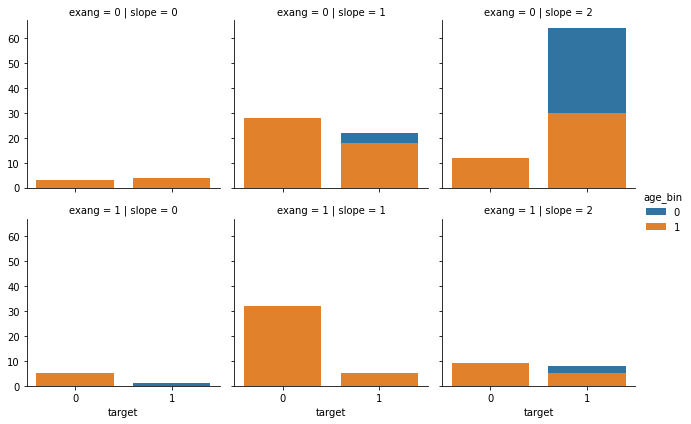

In [95]:
plt.figure(figsize=(15,15))
F = sns.FacetGrid(df, col='slope', row ='exang', hue='age_bin')
F.map(sns.countplot, 'target').add_legend()
plt.show()

- Kelompok dengan exang = 0, yang banyak memiliki penyakit jantung adalah mereka yang memiliki jenis ST segment downslopling
- Kelompok dengan exang = 1, lebih banyak yang tidak memiliki penyakit jantung.
- Saya berasumsi kolom exang memiliki pengaruh dalam memiliki penyakit jantung
- Saat kita beraktivitas fisik, jantung anda membutuhkan lebih banyak darah, tetapi arteri yang menyempit memperlambat aliran darah

## Feature Selection
- Saya berasumsi jika nilai korelasi < 0.2 atau -0.2 maka sudah bisa dianggap tidak ada korelasi

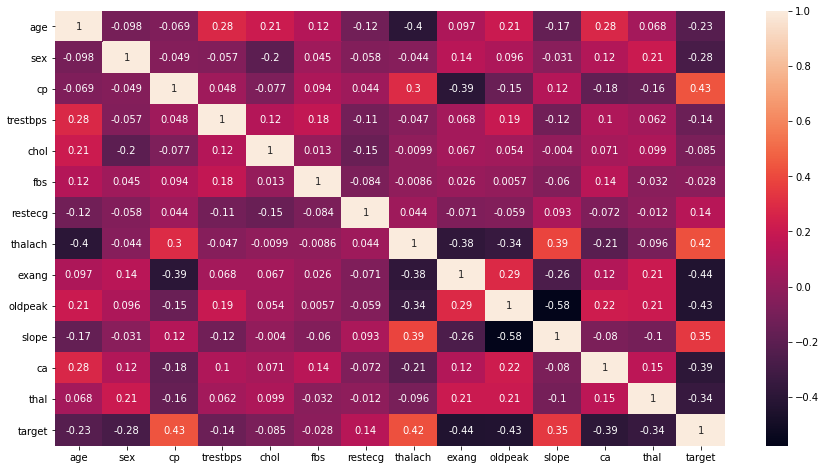

In [98]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [107]:
import scipy.stats as ss
from collections import Counter

In [108]:
## Cek asosiasi
def cramers_v(x, y):
	confusion_matrix = pd.crosstab(x, y)
	chi2 = ss.chi2_contingency(confusion_matrix)[0]
	n = confusion_matrix.sum().sum()
	phi2 = chi2/n
	r, k = confusion_matrix.shape
	phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
	rcorr = r-((r-1)**2)/(n-1)
	kcorr = k-((k-1)**2)/(n-1)
	return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

In [109]:
assoc_cramers = []
for i in df.columns:
  assoc = round((cramers_v(df['target'], df[i])),2)
  assoc_cramers.append(assoc)

In [112]:
data = pd.DataFrame(data= [assoc_cramers], columns=df.columns, index=['target'])

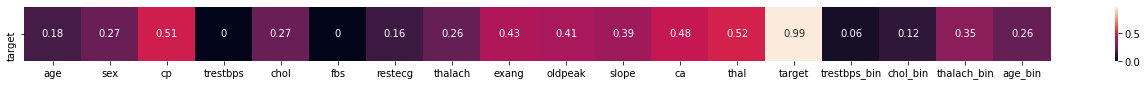

In [113]:
plt.figure(figsize=(23, 1))
sns.heatmap(data, annot=True)
plt.show()

- Feature yang sudah di binning akan saya masukan mengganti feature asli

In [99]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_bin,chol_bin,thalach_bin,age_bin
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,0,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,1,1,1


In [118]:
df_select = df.drop(columns=['age','trestbps','chol','thalach'])

In [119]:
df_select.head(3)

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,trestbps_bin,chol_bin,thalach_bin,age_bin
0,1,3,1,0,0,2.3,0,0,1,1,1,0,0,1
1,1,2,0,1,0,3.5,0,0,2,1,0,1,1,0
2,0,1,0,0,0,1.4,2,0,2,1,0,0,1,0


In [121]:
from sklearn.model_selection import train_test_split

In [131]:
X = df_select.drop(columns ='target')
y = df_select['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, stratify=y, random_state=42)

## Training Model

### Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression

In [132]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
y_logreg = logreg.predict(X_test)
y_train_logreg = logreg.predict(X_train)

### KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [142]:
y_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)

### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
y_rf = knn.predict(X_test)
y_train_rf = knn.predict(X_train)

### Evaluation Matrix

#### Logistic Regression

In [146]:
from sklearn.metrics import classification_report, confusion_matrix

In [147]:
print(classification_report(y_train, y_train_logreg))  ## train data

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       110
           1       0.85      0.89      0.87       132

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



In [150]:
cm = confusion_matrix(y_train, y_train_logreg, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,117,15
Akt 0,21,89


In [151]:
print(classification_report(y_test, y_logreg))  ## test data

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



In [155]:
cm = confusion_matrix(y_test, y_logreg, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,29,4
Akt 0,9,19


#### KNN

In [152]:
print(classification_report(y_train, y_train_knn))  ## train data

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       110
           1       0.88      0.95      0.92       132

    accuracy                           0.90       242
   macro avg       0.91      0.90      0.90       242
weighted avg       0.91      0.90      0.90       242



In [153]:
cm = confusion_matrix(y_train, y_train_knn, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,126,6
Akt 0,17,93


In [154]:
print(classification_report(y_test, y_knn))  ## test data

              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.74      0.85      0.79        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [156]:
cm = confusion_matrix(y_test, y_knn, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,28,5
Akt 0,10,18


#### Random Forest

In [157]:
print(classification_report(y_train, y_train_rf))  ## train data

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       110
           1       0.88      0.95      0.92       132

    accuracy                           0.90       242
   macro avg       0.91      0.90      0.90       242
weighted avg       0.91      0.90      0.90       242



In [158]:
cm = confusion_matrix(y_train, y_train_rf, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,126,6
Akt 0,17,93


In [159]:
print(classification_report(y_test, y_rf))  ## test data

              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.74      0.85      0.79        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [160]:
cm = confusion_matrix(y_test, y_rf, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,28,5
Akt 0,10,18


## Hyperparameter Tuning

### Logistic Regression

In [ ]:
logreg = LogisticRegression(class_weight={0:.54, 1:.45})

param_logreg = {"penalty" : ['l1', 'l2', 'elasticnet'],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}